In [ ]:
!pip install torch torchvision torchaudio
!pip install shap
!pip install scikit-learn
!pip install tqdm

In [2]:
import pandas as pd
import numpy as np
import pickle
import os
import openpyxl

from data_functions import *

In [ ]:
'''
Add code to reconstruct from scratch the dataset

'''

In [3]:
# ------------------------ Load, Process, and Save Data ------------------------

#Define Paths - CHANGE per run
in_path = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Input'
out_path = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output'


# Load US Preprocessed Data
bloomberg_df = pd.read_excel(in_path + '\Bloomberg\dataset bloomberg.xlsx', index_col=0, parse_dates=True)
Y_df = bloomberg_df.iloc[:-1,-6:]
X_df = bloomberg_df.iloc[:-1,:-6]

# Load US macroeconomic data
us_economic_directory = "C:\\Users\\azorb\\PycharmProjects\\Thesis\\Input Data\\US\\50Y"
additional_data = load_input(us_economic_directory, "1990-01-02")

X_df = X_df.merge(additional_data, left_index=True, right_index=True)

# Save Data
X_df.to_csv(out_path + '\Independent\X_df.csv')
Y_df.to_csv(out_path + '\Dependent\Y_df.csv')


C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\data_functions.py:96: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['observation_date'] = pd.to_datetime(
C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\data_functions.py:96: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['observation_date'] = pd.to_datetime(
C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\data_functions.py:96: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['observation_date'] = pd.to_datetime(
C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\data_functions.py:96: UserWarning: Parsing dates in %Y-%m-%d format 

In [4]:
# Compute delta for different horizons
Y_df_changes = compute_y_df_changes(Y_df)

# Compute directional binary indicators
Y_df_direction = compute_change_directions(Y_df)

horizons = [1,21,63,252]


for horizon in horizons:
    globals()[f'Y_df_change_{horizon}'] = Y_df_changes[f'Y_df_change_{horizon}']
    globals()[f'Y_df_change_dir_{horizon}'] = Y_df_direction[f'Y_df_change_{horizon}']
    Y_df_changes[f'Y_df_change_{horizon}'].to_csv(out_path + f'\Dependent\Changes\Y_df_change_{horizon}.csv')
    Y_df_direction[f'Y_df_change_{horizon}'].to_csv(out_path + f'\Dependent\Classification\Y_df_change_dir_{horizon}.csv')
    for col in Y_df_direction[f'Y_df_change_{horizon}'].columns:
        X_df[f'Y_df_change_dir_{horizon}_{col}'] = Y_df_direction[f'Y_df_change_{horizon}'][col]
        X_df[f'Y_df_change_{horizon}_{col}'] = Y_df_changes[f'Y_df_change_{horizon}'][col]

X_df.dropna(inplace=True)

# Find common dates
common_idx = X_df.index.intersection(Y_df.index)

# Align both datasets to those dates
X_df = X_df.loc[common_idx].copy()
Y_df = Y_df.loc[common_idx].copy()

In [5]:
X_df

,EUDR1T Index,EUR001M Index,EUR003M Index,EUR006M Index,EUR009M Index,EUR012M Index,EREU001W Index,ER1 Index,ER2 Index,ER3 Index,...,Y_df_change_dir_252_US_6m,Y_df_change_252_US_6m,Y_df_change_dir_252_US_1y,Y_df_change_252_US_1y,Y_df_change_dir_252_US_3y,Y_df_change_252_US_3y,Y_df_change_dir_252_US_5y,Y_df_change_252_US_5y,Y_df_change_dir_252_US_10y,Y_df_change_252_US_10y
2004-09-13,2.0375,2.076,2.116,2.207,2.302,2.405,2.0,400.0,203,185,...,1,0.852941,1,0.735537,1,0.322430,1,0.108197,1,0.009709
2004-09-14,2.0375,2.077,2.116,2.205,2.298,2.394,2.0,430.0,203,185,...,1,0.843137,1,0.719008,1,0.364078,1,0.135593,1,0.027228
2004-09-15,2.0375,2.076,2.116,2.202,2.289,2.388,2.0,440.0,203,185,...,1,0.825243,1,0.727273,1,0.371981,1,0.137584,1,0.022005
2004-09-16,2.0475,2.078,2.116,2.206,2.304,2.404,2.0,440.0,203,185,...,1,0.851485,1,0.791304,1,0.410256,1,0.154386,1,0.030303
2004-09-17,2.0375,2.079,2.116,2.203,2.288,2.372,2.0,440.0,203,185,...,1,0.900000,1,0.867257,1,0.466321,1,0.179577,1,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,2.6500,2.526,2.485,2.389,-0.194,2.409,2.9,185.0,391,564,...,0,-0.202980,0,-0.174000,0,-0.064665,0,-0.014458,1,0.031250
2025-02-28,2.7202,2.463,2.464,2.355,-0.194,2.394,2.9,185.0,391,564,...,0,-0.208566,0,-0.185629,0,-0.086957,0,-0.038186,1,0.011933
2025-03-03,2.7200,2.466,2.464,2.331,-0.194,2.365,2.9,185.0,391,564,...,0,-0.198885,0,-0.194444,0,-0.118834,0,-0.074592,0,-0.030303
2025-03-04,2.6974,2.471,2.491,2.342,-0.194,2.381,2.9,185.0,391,564,...,0,-0.204461,0,-0.200000,0,-0.126386,0,-0.073903,0,-0.020882


In [7]:
X_df.to_csv(r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Independent\X_df_raw.csv')

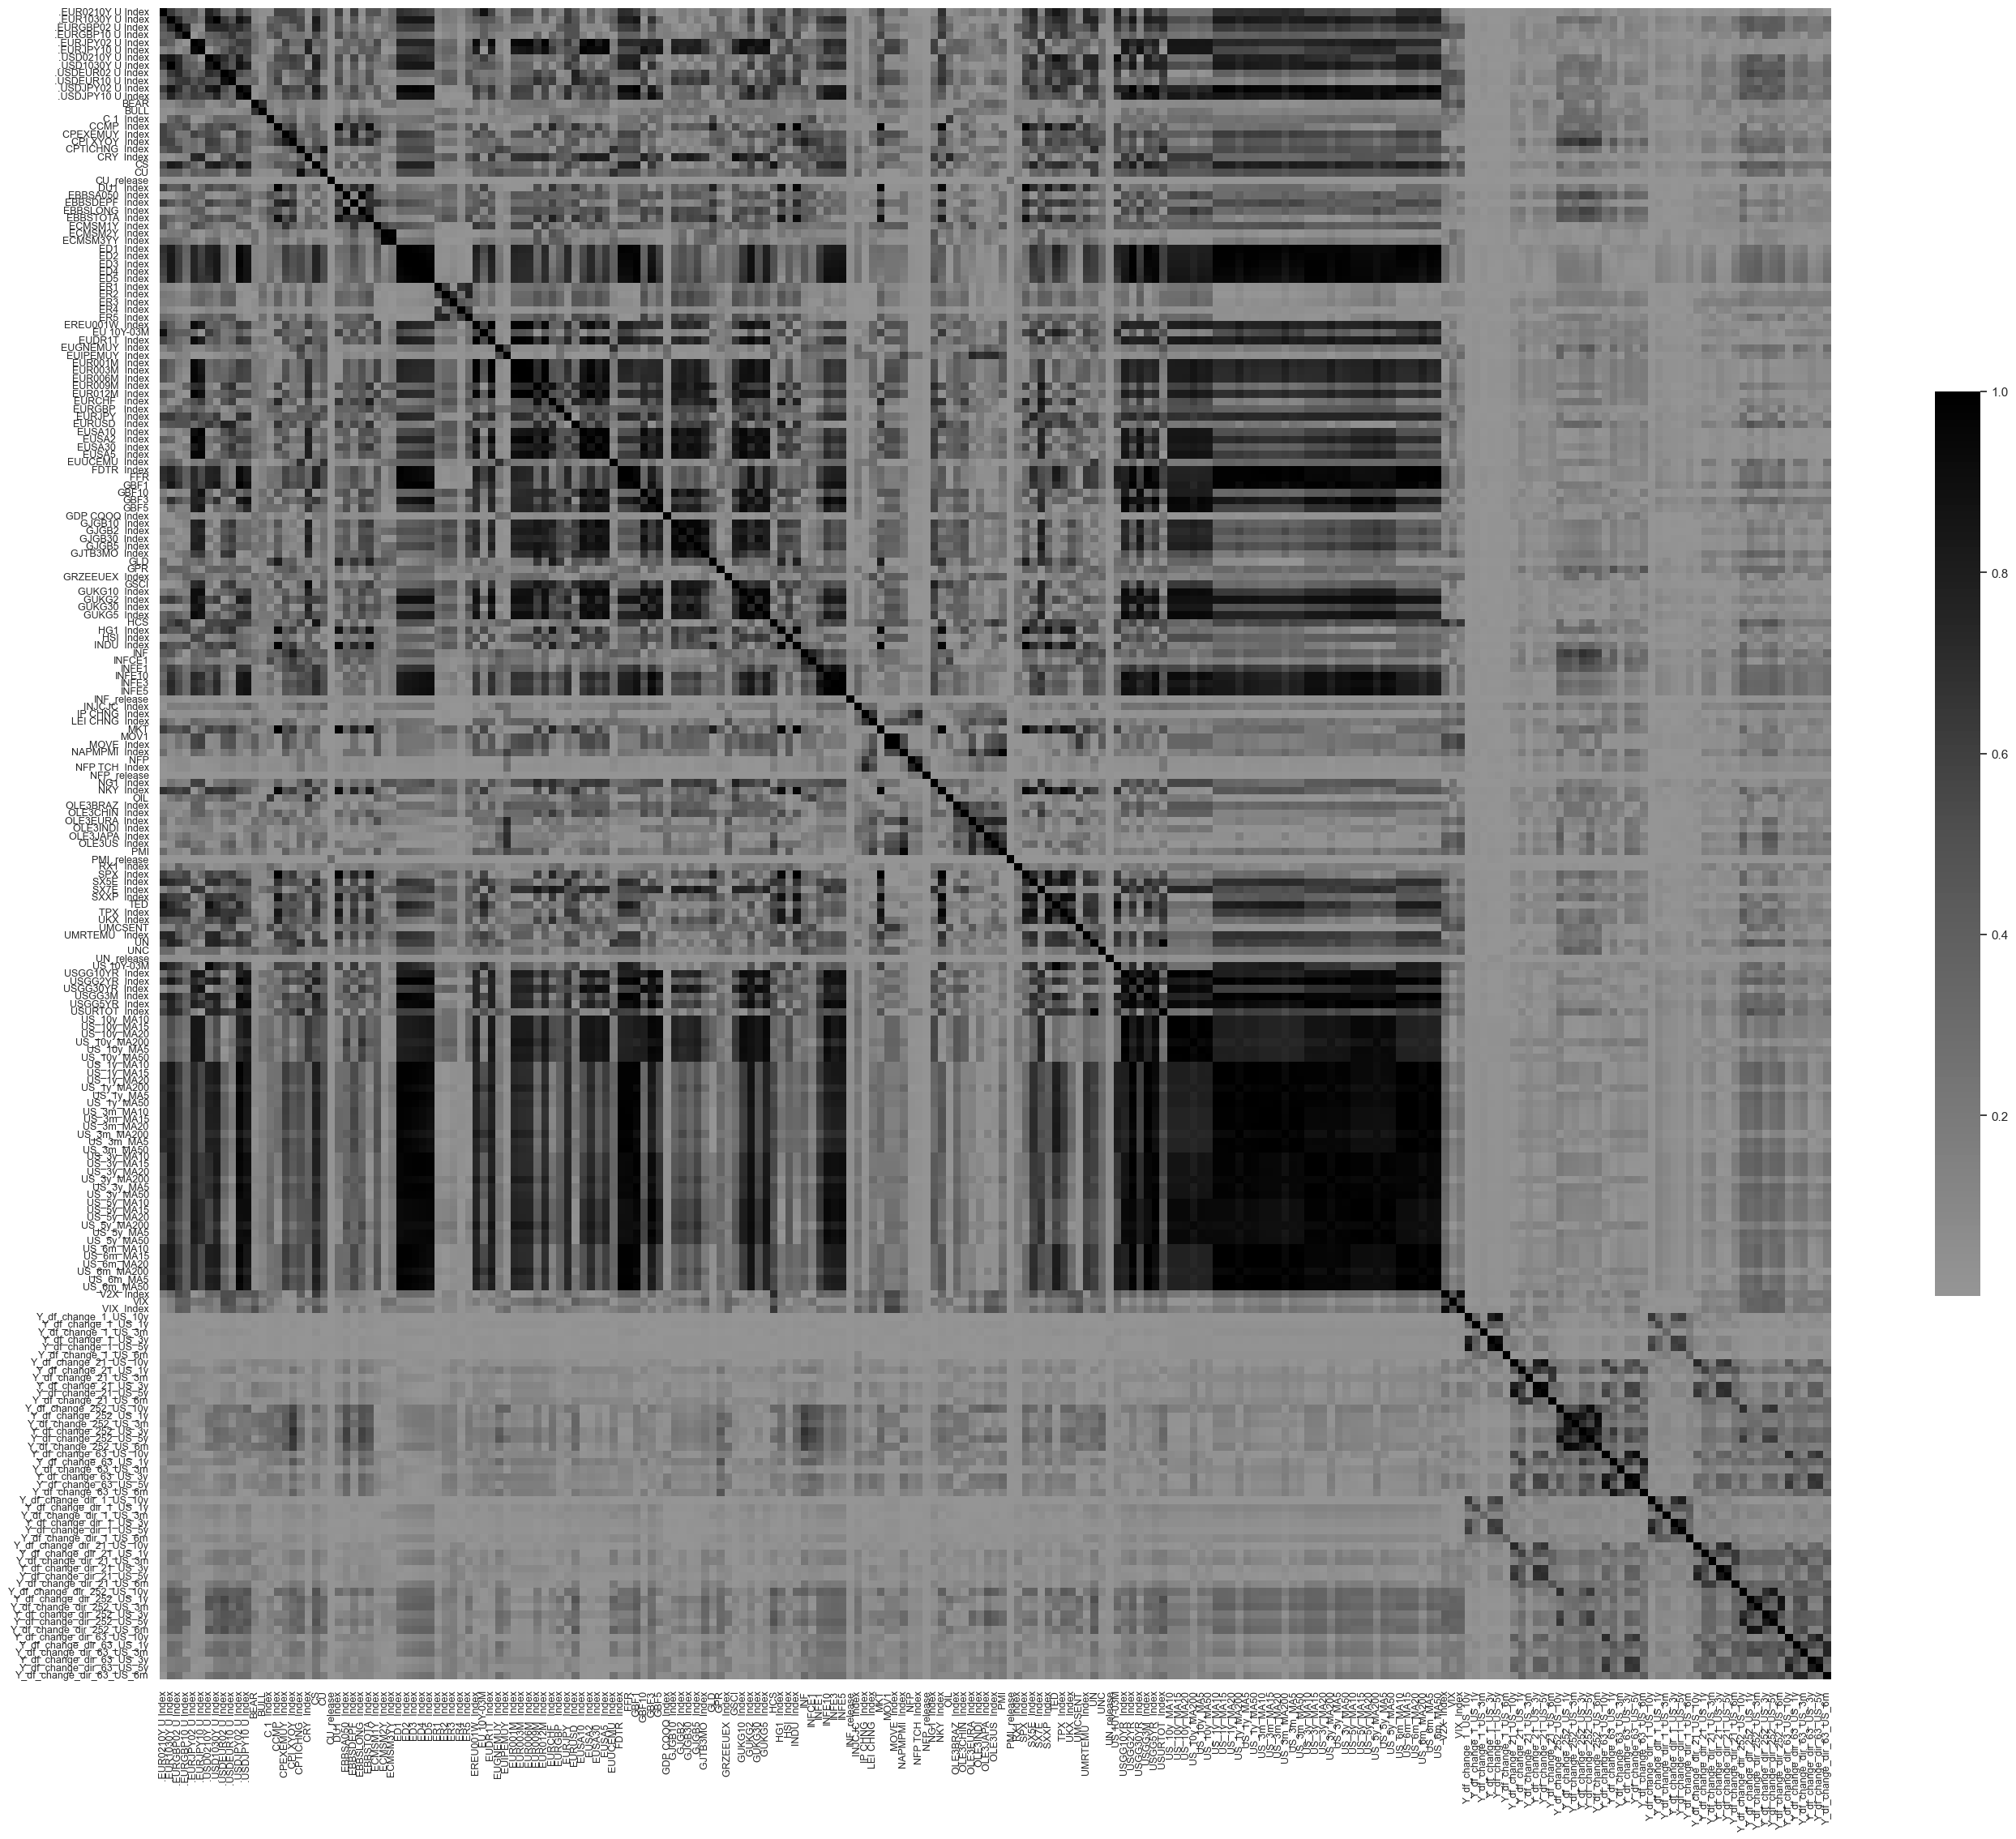

[INFO] Removed 106 highly correlated features (correlation > 0.9)
[INFO] Remaining features: 113


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Seaborn theme with white background
sns.set_theme(style='white')

def remove_highly_correlated_features(X_df, threshold=0.95, plot=False):
    # Step 1: Compute absolute correlation matrix
    corr_matrix = X_df.corr().abs()

    # Step 2: Upper triangle mask to ignore self-correlation
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Step 3: Identify columns with high correlation
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Step 4: Optionally visualize in black & white on white background
    if plot:
        sorted_cols = sorted(corr_matrix.columns)
        sorted_corr = corr_matrix.loc[sorted_cols, sorted_cols]

        # Create figure with white background
        fig, ax = plt.subplots(figsize=(28, 24), facecolor='white')
        sns.heatmap(
            sorted_corr,
            ax=ax,
            cmap='Greys',             # Black-and-white colormap
            center=0,
            annot=False,
            fmt='.2f',
            square=True,
            xticklabels=True,
            yticklabels=True,
            cbar_kws={"shrink": 0.5},
            linewidths=0
        )
        # Ensure plot area is white
        ax.set_facecolor('white')

        # Increase font sizes for readability
        plt.xticks(rotation=90, fontsize=9)
        plt.yticks(fontsize=9)
        ax.title.set_fontsize(18)
        plt.tight_layout()
        plt.show()

    # Step 5: Drop redundant columns
    X_df_filtered = X_df.drop(columns=to_drop)

    print(f"[INFO] Removed {len(to_drop)} highly correlated features (correlation > {threshold})")
    print(f"[INFO] Remaining features: {X_df_filtered.shape[1]}")
    return X_df_filtered

# Example usage:
X_df_filtered = remove_highly_correlated_features(X_df, threshold=0.9, plot=True)

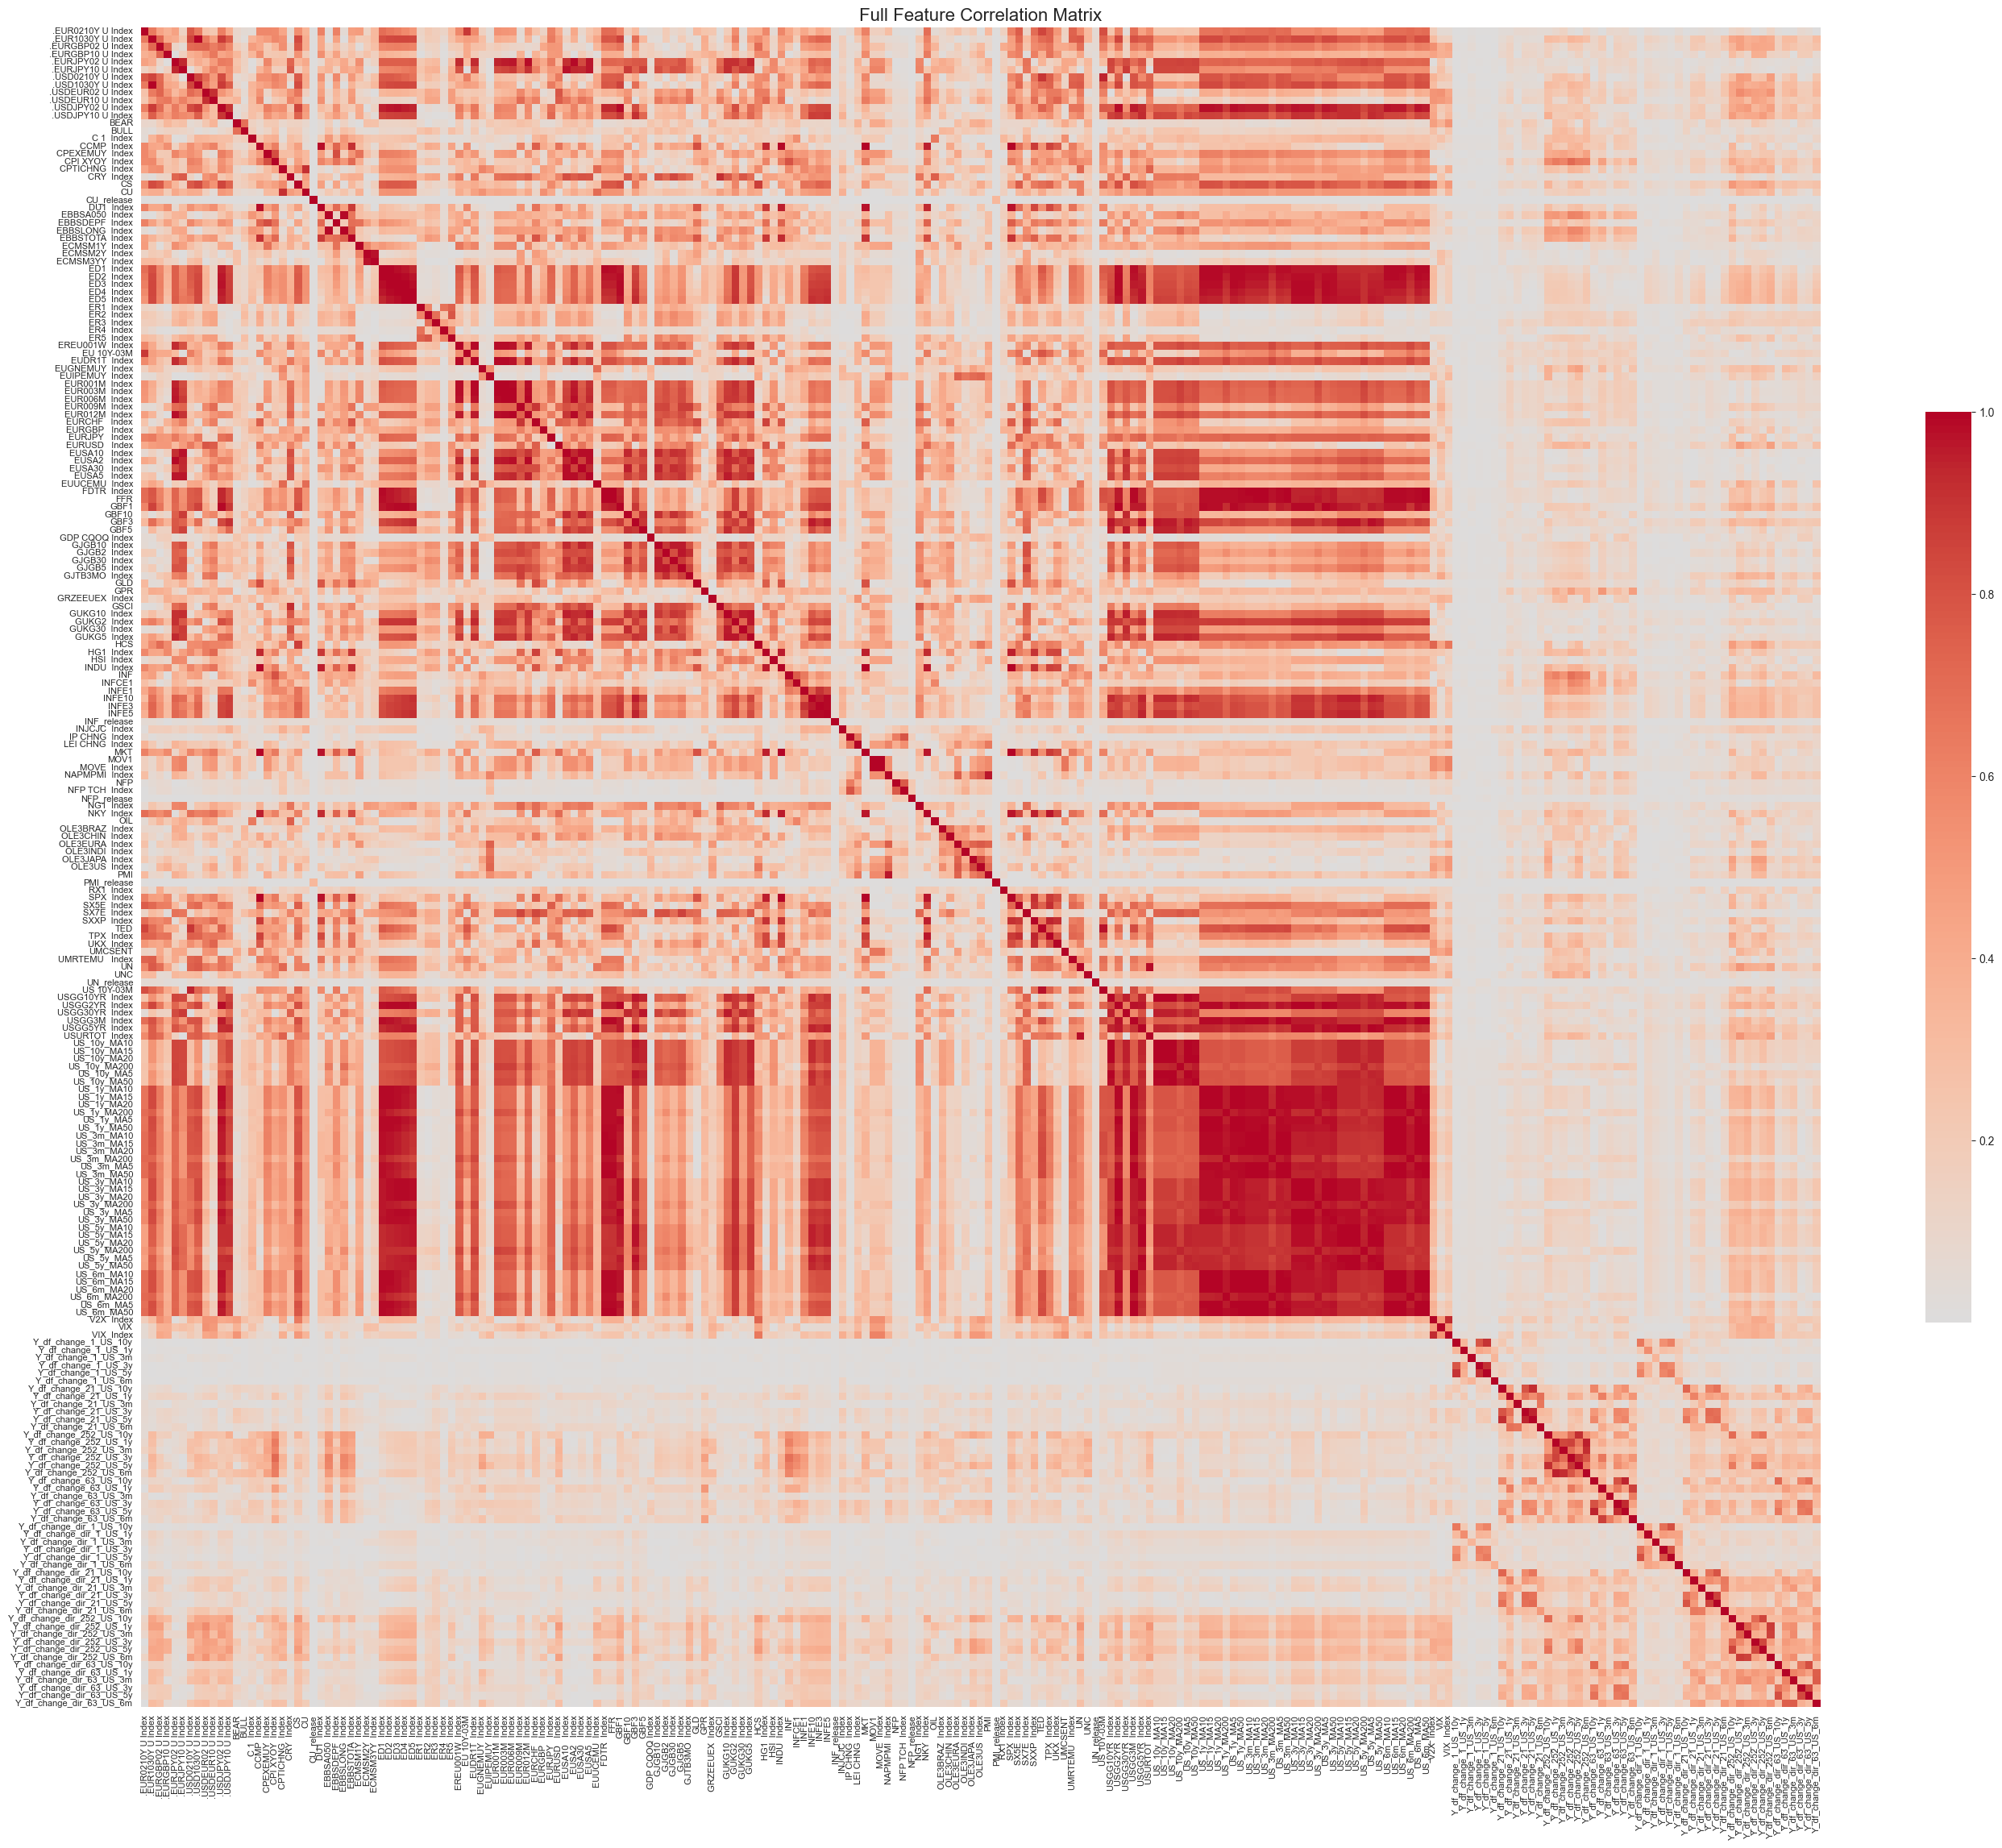

[INFO] Removed 106 highly correlated features (correlation > 0.9)
[INFO] Remaining features: 113


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def remove_highly_correlated_features(X_df, threshold=0.95, plot=False):
    # Step 1: Compute absolute correlation matrix
    corr_matrix = X_df.corr().abs()

    # Step 2: Upper triangle mask to ignore self-correlation
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Step 3: Identify columns with high correlation
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Step 4: Optionally visualize
    if plot:
        sorted_cols = sorted(corr_matrix.columns)
        sorted_corr = corr_matrix.loc[sorted_cols, sorted_cols]

        plt.figure(figsize=(28, 24))  # Increased size
        sns.heatmap(
            sorted_corr,
            cmap='coolwarm',
            center=0,
            annot=False,
            fmt='.2f',
            square=True,
            xticklabels=True,
            yticklabels=True,
            cbar_kws={"shrink": 0.5}
        )
        plt.xticks(rotation=90, fontsize=8)
        plt.yticks(fontsize=8)
        plt.title("Full Feature Correlation Matrix", fontsize=16)
        plt.tight_layout()
        plt.show()

    # Step 5: Drop redundant columns
    X_df_filtered = X_df.drop(columns=to_drop)

    print(f"[INFO] Removed {len(to_drop)} highly correlated features (correlation > {threshold})")
    print(f"[INFO] Remaining features: {X_df_filtered.shape[1]}")
    return X_df_filtered

# Example usage
X_df_filtered = remove_highly_correlated_features(X_df, threshold=0.9, plot=True)

[INFO] Removed 106 highly correlated features (correlation > 0.9)
[INFO] Remaining features: 113


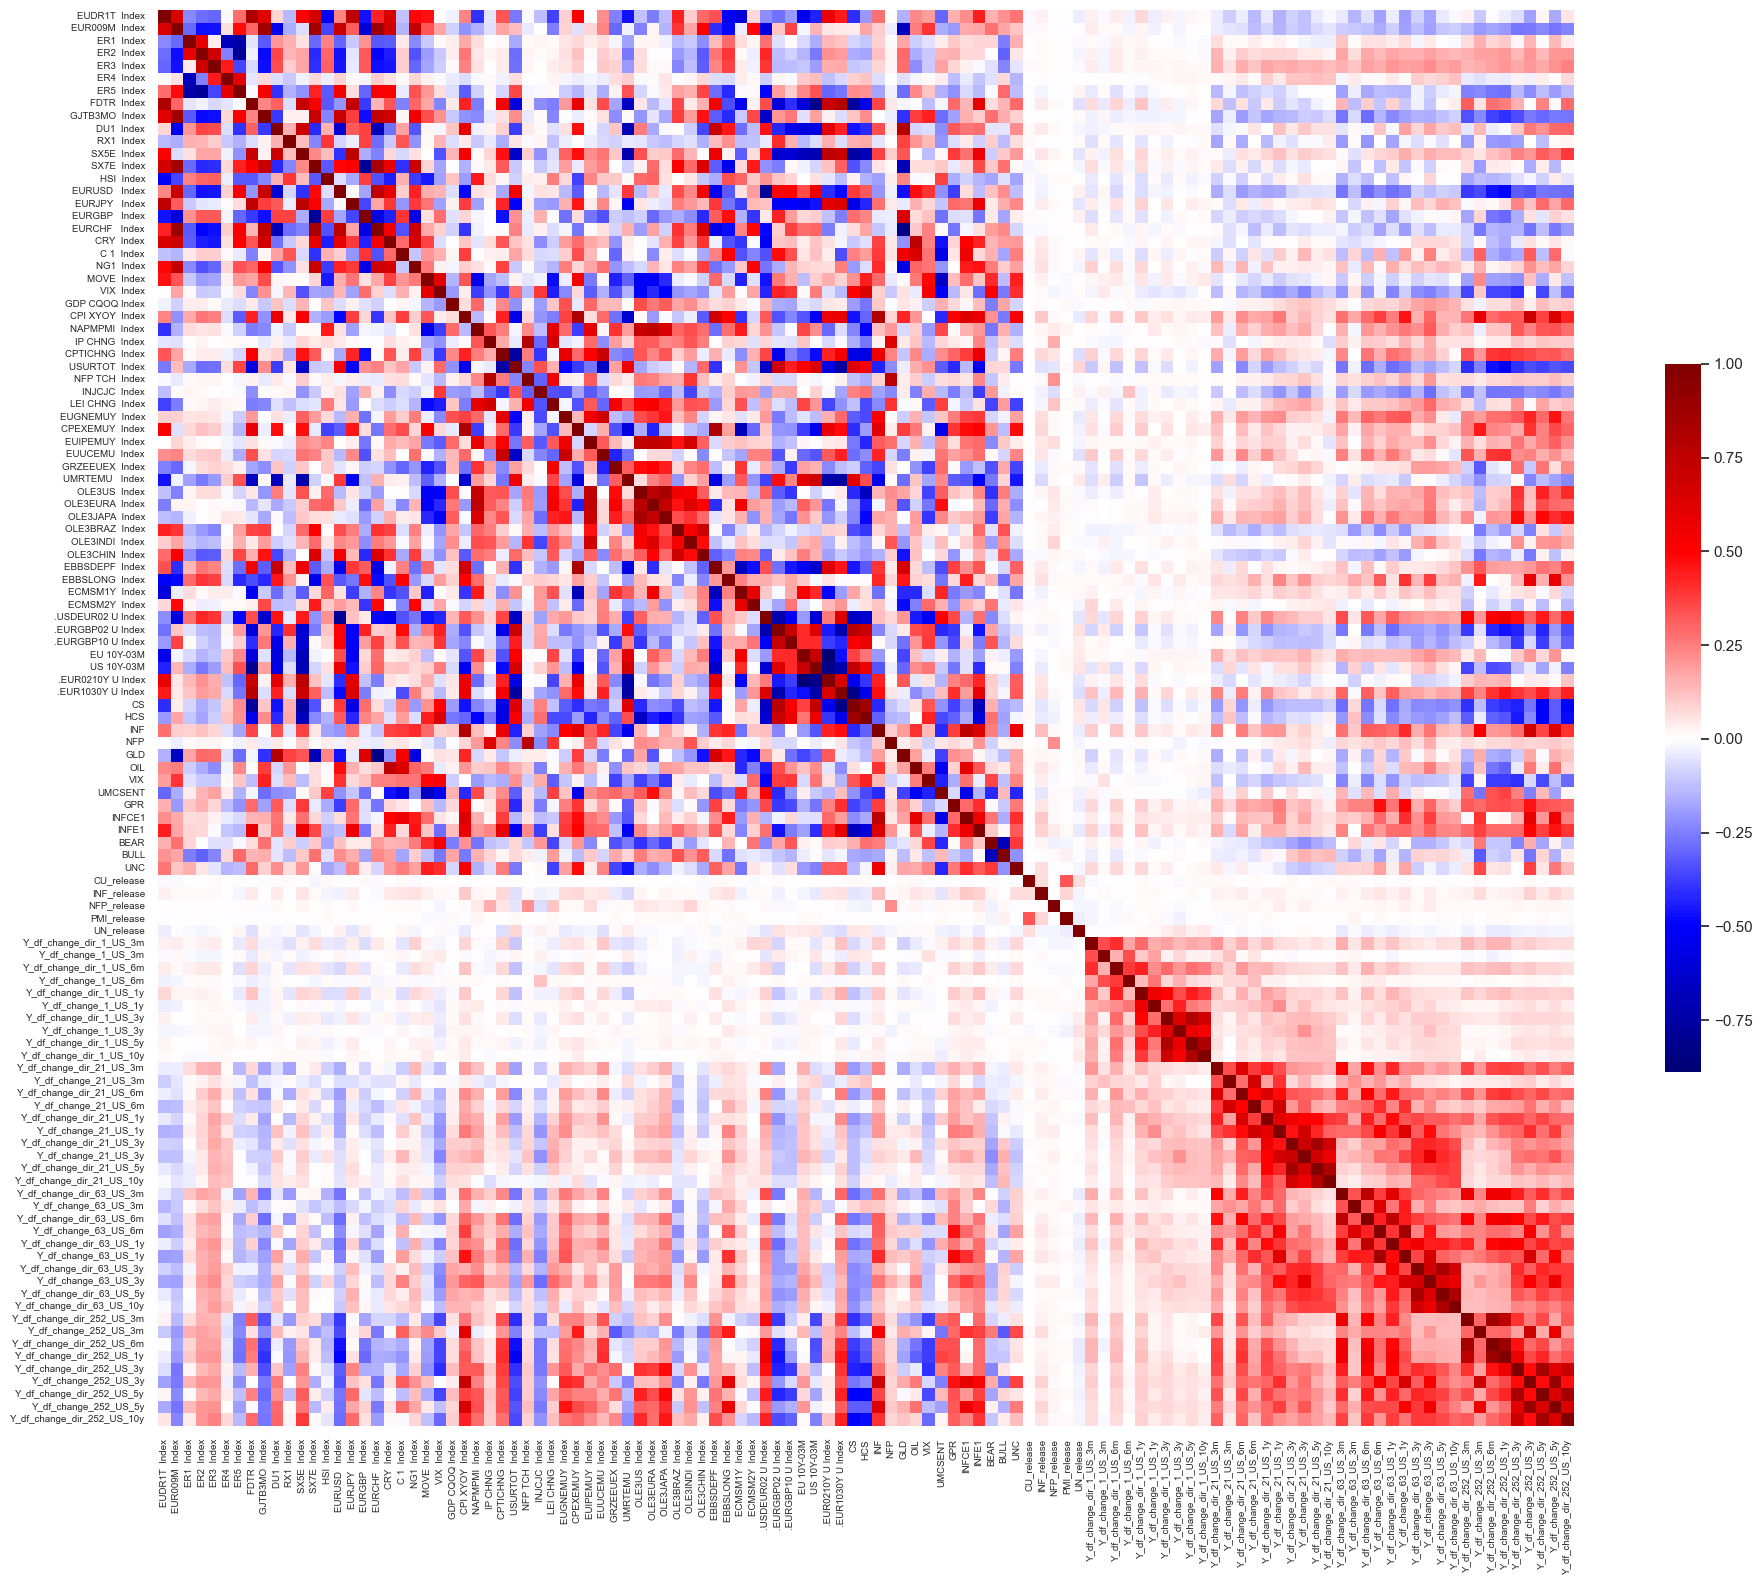

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def remove_highly_correlated_features(X_df, threshold=0.95, plot=False):
    # Step 1: Compute absolute correlation matrix
    corr_matrix = X_df.corr().abs()

    # Step 2: Upper triangle mask to ignore self-correlation
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Step 3: Identify columns with high correlation
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Step 4: Drop redundant columns
    X_df_filtered = X_df.drop(columns=to_drop)

    print(f"[INFO] Removed {len(to_drop)} highly correlated features (correlation > {threshold})")
    print(f"[INFO] Remaining features: {X_df_filtered.shape[1]}")

    # Step 5: Optionally visualize correlation of remaining features
    if plot:
        corr_filtered = X_df_filtered.corr()

        plt.figure(figsize=(20, 16))
        sns.heatmap(
            corr_filtered,
            cmap='seismic',        # vivid red/blue diverging palette
            center=0,
            annot=False,
            fmt='.2f',
            square=True,
            xticklabels=True,
            yticklabels=True,
            cbar_kws={"shrink": 0.5}
        )
        plt.xticks(rotation=90, fontsize=7)
        plt.yticks(fontsize=7)
        plt.tight_layout()
        plt.show()

    return X_df_filtered

# Example usage
X_df_filtered = remove_highly_correlated_features(X_df, threshold=0.9, plot=True)

In [7]:
X_df_filtered.to_csv(r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Independent\X_df_filtered.csv')
X_df_filtered

,EUDR1T Index,EUR009M Index,ER1 Index,ER2 Index,ER3 Index,ER4 Index,ER5 Index,FDTR Index,GJTB3MO Index,DU1 Index,...,Y_df_change_dir_63_US_10y,Y_df_change_dir_252_US_3m,Y_df_change_252_US_3m,Y_df_change_dir_252_US_6m,Y_df_change_dir_252_US_1y,Y_df_change_dir_252_US_3y,Y_df_change_252_US_3y,Y_df_change_dir_252_US_5y,Y_df_change_252_US_5y,Y_df_change_dir_252_US_10y
2004-09-13,2.0375,2.302,400.0,203,185,405,505,1.5,0.0090,31.10,...,0,1,0.765957,1,1,1,0.322430,1,0.108197,1
2004-09-14,2.0375,2.298,430.0,203,185,405,505,1.5,0.0080,30.85,...,0,1,0.765957,1,1,1,0.364078,1,0.135593,1
2004-09-15,2.0375,2.289,440.0,203,185,405,505,1.5,0.0080,30.15,...,0,1,0.739583,1,1,1,0.371981,1,0.137584,1
2004-09-16,2.0475,2.304,440.0,203,185,405,505,1.5,0.0080,29.70,...,0,1,0.757895,1,1,1,0.410256,1,0.154386,1
2004-09-17,2.0375,2.288,440.0,203,185,405,505,1.5,0.0080,29.95,...,0,1,0.800000,1,1,1,0.466321,1,0.179577,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,2.6500,-0.194,185.0,391,564,635,660,4.5,0.3000,294.60,...,1,0,-0.211679,0,0,0,-0.064665,0,-0.014458,1
2025-02-28,2.7202,-0.194,185.0,391,564,635,660,4.5,0.3300,293.60,...,1,0,-0.211679,0,0,0,-0.086957,0,-0.038186,1
2025-03-03,2.7200,-0.194,185.0,391,564,635,660,4.5,0.3353,283.50,...,0,0,-0.206204,0,0,0,-0.118834,0,-0.074592,0
2025-03-04,2.6974,-0.194,185.0,391,564,635,660,4.5,0.3403,278.50,...,1,0,-0.208029,0,0,0,-0.126386,0,-0.073903,0


In [74]:
# ---------------------- Imports ---------------------- #
import pandas as pd
import numpy as np
import shap
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# ---------------------- Reproducibility ---------------------- #
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

# ---------------------- LSTM Model ---------------------- #
class YieldLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])

# ---------------------- Sequence Generation ---------------------- #
def generate_sequences(X_df, Y_df, sequence_length, forecast_horizon):
    X_arr, Y_arr = X_df.values.astype(np.float32), Y_df.values.astype(np.float32)
    X_seq, Y_seq, valid_idx = [], [], []
    for i in range(sequence_length, len(X_arr) - forecast_horizon):
        X_seq.append(X_arr[i-sequence_length:i])
        Y_seq.append(Y_arr[i + forecast_horizon - 1])
        valid_idx.append(X_df.index[i + forecast_horizon - 1])
    return np.array(X_seq), np.array(Y_seq), valid_idx

# ---------------------- SHAP Evaluation ---------------------- #
def run_shap_lstm_ts_cv(X_df, Y_df, forecast_horizon=1, sequence_length=252, n_folds=5, hidden_dim=64):
    assert len(X_df) == len(Y_df)
    common_idx = X_df.index.intersection(Y_df.index)
    X_df, Y_df = X_df.loc[common_idx], Y_df.loc[common_idx]

    X_seq, Y_seq, idx_seq = generate_sequences(X_df, Y_df, sequence_length, forecast_horizon)
    n_samples = len(X_seq)
    fold_size = n_samples // n_folds

    input_dim = X_df.shape[1]
    output_dim = Y_df.shape[1]
    shap_df = pd.DataFrame(index=X_df.columns)

    for fold in range(n_folds):
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size

        X_train = np.concatenate([X_seq[:val_start], X_seq[val_end:]])
        Y_train = np.concatenate([Y_seq[:val_start], Y_seq[val_end:]])
        X_val = X_seq[val_start:val_end]
        Y_val = Y_seq[val_start:val_end]

        # ---------------------- Diagnostic Block ---------------------- #
        inf_cols = X_df.columns[np.isinf(X_df).any()]
        print("[DEBUG] Columns with Inf values:", inf_cols.tolist())


        print(f"[DEBUG] Checking for NaNs or Infs in X_train before scaling (fold {fold})")
        X_train_flat = X_train.reshape(-1, X_train.shape[-1])
        nan_mask = np.isnan(X_train_flat).any(axis=1)
        inf_mask = np.isinf(X_train_flat).any(axis=1)

        if nan_mask.any():
            print(f"[ERROR] Found NaNs in {nan_mask.sum()} rows")
        if inf_mask.any():
            print(f"[ERROR] Found Infs in {inf_mask.sum()} rows")
        if not nan_mask.any() and not inf_mask.any():
            print("[DEBUG] No NaNs or Infs detected in X_train")

        # Optionally print offending rows
        bad_rows = nan_mask | inf_mask
        if bad_rows.any():
            print("First few problematic rows (after reshaping):")
            print(X_train_flat[bad_rows][:5])
            raise ValueError("X_train contains NaN or Inf values.")


        scaler = StandardScaler()
        X_train_2d = X_train.reshape(-1, X_train.shape[-1])
        X_train_scaled = scaler.fit_transform(X_train_2d).reshape(X_train.shape)
        X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = YieldLSTM(input_dim, hidden_dim, output_dim).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
        Y_train_t = torch.tensor(Y_train, dtype=torch.float32).to(device)
        for _ in range(10):
            optimizer.zero_grad()
            output = model(X_train_t)
            loss = criterion(output, Y_train_t)
            loss.backward()
            optimizer.step()

        if fold == n_folds - 1:
            model.eval()
            X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
            explainer = shap.DeepExplainer(model, X_train_t[:100])
            shap_vals = explainer.shap_values(X_val_t, check_additivity=False)

            if isinstance(shap_vals, list):
                for i, sv in enumerate(shap_vals):
                    if sv.ndim == 3:
                        sv = sv[:, -1, :]
                    shap_df[f'shap_mean_abs_maturity_{i+1}'] = np.abs(sv).mean(axis=0)
            else:
                for i in range(output_dim):
                    sv = shap_vals[:, -1, i]
                    shap_df[f'shap_mean_abs_maturity_{i+1}'] = np.abs(sv).mean(axis=0)

    return shap_df

In [76]:
def run_all_shap():
    horizons = [1, 5, 21, 63, 252]
    base_path = "Output"
    for h in horizons:
        print(f"[INFO] Running SHAP for horizon {h}")
        X_df = pd.read_csv(os.path.join(base_path, "Independent", "X_df_filtered.csv"), index_col=0, parse_dates=True)
        Y_df = pd.read_csv(os.path.join(base_path, "Dependent", "Classification", f"Y_df_change_dir_{h}.csv"), index_col=0, parse_dates=True)

        # Clean and align
        X_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        X_df.dropna(inplace=True)

        # Align both datasets after cleaning
        common_idx = X_df.index.intersection(Y_df.index)
        X_df = X_df.loc[common_idx]
        Y_df = Y_df.loc[common_idx]

        # Final assert to ensure alignment
        assert len(X_df) == len(Y_df), f"Mismatch: X_df={len(X_df)}, Y_df={len(Y_df)}"

        # Print shapes
        print(f"X_df shape: {X_df.shape}")
        print(f"Y_df shape: {Y_df.shape}")

        shap_df = run_shap_lstm_ts_cv(X_df, Y_df, forecast_horizon=h)

        output_dir = os.path.join(base_path, "SHAP")
        os.makedirs(output_dir, exist_ok=True)
        shap_df.to_csv(os.path.join(output_dir, f"shap_df_h{h}.csv"))

if __name__ == "__main__":
    run_all_shap()


[INFO] Running SHAP for horizon 1
X_df shape: (5255, 113)
Y_df shape: (5255, 6)
[DEBUG] Columns with Inf values: []
[DEBUG] Checking for NaNs or Infs in X_train before scaling (fold 0)
[DEBUG] No NaNs or Infs detected in X_train
[DEBUG] Columns with Inf values: []
[DEBUG] Checking for NaNs or Infs in X_train before scaling (fold 1)
[DEBUG] No NaNs or Infs detected in X_train
[DEBUG] Columns with Inf values: []
[DEBUG] Checking for NaNs or Infs in X_train before scaling (fold 2)
[DEBUG] No NaNs or Infs detected in X_train
[DEBUG] Columns with Inf values: []
[DEBUG] Checking for NaNs or Infs in X_train before scaling (fold 3)
[DEBUG] No NaNs or Infs detected in X_train
[DEBUG] Columns with Inf values: []
[DEBUG] Checking for NaNs or Infs in X_train before scaling (fold 4)
[DEBUG] No NaNs or Infs detected in X_train


KeyboardInterrupt: 

In [15]:
shap_df['Total Feature Importance'] = shap_df.sum(axis=1)
shap_df.sort_values('Total Feature Importance', ascending=False, inplace=True)

shap_d

[INFO] Processing SHAP for horizon: 1d


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\azorb\\PycharmProjects\\Predicting the Yield Curve\\Data Processing\\Output\\SHAP\\shap_df_1d.csv'

In [116]:
shap_df.loc[:,'Total Feature Importance']

In [8]:

def load_target(horizon: int) -> pd.DataFrame:
    path = fr"dns_kf_total_h{horizon}_full_dataset.csv"
    if not os.path.exists(path):
        raise FileNotFoundError(path)
    df = pd.read_csv(path, parse_dates=["eval_date"]).sort_values("eval_date")

    true = df["true_yields"].apply(_parse_vec)
    pred = df["forecast_yields"].apply(_parse_vec)
    errors = pred.subtract(true)

    return pd.DataFrame(errors.tolist(),
                        index=df["eval_date"],
                        columns=[f"err_{i}" for i in range(6)])

In [ ]:
import os
import pandas as pd

# ---------- Config ---------- #
base_dir = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output'
dns_dir = os.path.join(base_dir, 'DNS_Full_Forecast')
out_path = base_dir
horizons = [1, 5, 21, 63, 252]

X_df = pd.read_csv(r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Independent\X_df.csv', index_col=0, parse_dates=True)

# ---------- Read + Compute Deltas + Save ---------- #
Y_df_forecast_dict = {}

for h in horizons:
    file = os.path.join(dns_dir, f'dns_kf_total_h{h}_full_dataset.csv')
    dns_df = pd.read_csv(file, index_col=0, parse_dates=True)
    dns_df.columns = [col.strip() for col in dns_df.columns]  # Clean column names

    # Store for reference
    Y_df_forecast_dict[h] = dns_df[['true_yields']].applymap(eval).apply(pd.Series.explode).astype(float)

# Create a wide-format DataFrame from exploded yield columns
dns_dfs = []
for h, df in Y_df_forecast_dict.items():
    df.columns = [f'dns_yield_{h}_m{i+1}' for i in range(df.shape[1])]  # Assuming 6 maturities
    dns_dfs.append(df)

dns_df_all = pd.concat(dns_dfs, axis=1)

# ---------- Compute Changes and Add to X_df ---------- #
dns_changes = compute_y_df_changes(dns_df_all, horizons)
dns_directions = compute_change_directions(dns_changes)

for h in horizons:
    delta_df = dns_changes[f'Y_df_change_{h}']
    dir_df = dns_directions[f'Y_df_change_{h}']

    # Add to X_df
    for col in delta_df.columns:
        X_df[f'dns_delta_{h}_{col}'] = delta_df[col]
        X_df[f'dns_dir_{h}_{col}'] = dir_df[col]

    # Optionally save
    delta_df.to_csv(os.path.join(out_path, f'Dependent\\Changes\\dns_delta_{h}.csv'))
    dir_df.to_csv(os.path.join(out_path, f'Dependent\\Classification\\dns_dir_{h}.csv'))

# ---------- Final Alignment ---------- #
X_df.dropna(inplace=True)
common_idx = X_df.index.intersection(Y_df.index)
X_df = X_df.loc[common_idx].copy()
Y_df = Y_df.loc[common_idx].copy()


In [ ]:
# Compute delta for different horizons
Y_df_changes = compute_y_df_changes(Y_df)

# Compute directional binary indicators
Y_df_direction = compute_change_directions(Y_df)

for horizon in horizons:
    globals()[f'Y_df_change_{horizon}'] = Y_df_changes[f'Y_df_change_{horizon}']
    globals()[f'Y_df_change_dir_{horizon}'] = Y_df_direction[f'Y_df_change_{horizon}']
    Y_df_changes[f'Y_df_change_{horizon}'].to_csv(out_path + f'\Dependent\Changes\Y_df_change_{horizon}.csv')
    Y_df_direction[f'Y_df_change_{horizon}'].to_csv(out_path + f'\Dependent\Classification\Y_df_change_dir_{horizon}.csv')
    for col in Y_df_direction[f'Y_df_change_{horizon}'].columns:
        X_df[f'Y_df_change_dir_{horizon}_{col}'] = Y_df_direction[f'Y_df_change_{horizon}'][col]
        X_df[f'Y_df_change_{horizon}_{col}'] = Y_df_changes[f'Y_df_change_{horizon}'][col]

X_df.dropna(inplace=True)

# Find common dates
common_idx = X_df.index.intersection(Y_df.index)

# Align both datasets to those dates
X_df = X_df.loc[common_idx].copy()
Y_df = Y_df.loc[common_idx].copy()
